---
title: 'Walkthroughs and Exercises for *Machine Learning for Data Analytics with Python*'  
author: "Dr. Chester Ismay"  
---

In [1]:
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

# Display all outputs from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Intro: Getting Started with Machine Learning for Data-Driven Decisions

## Walkthrough #1: Setting Up the Python Environment for ML

If you haven't already installed Python, Jupyter, and the necessary packages, there are instructions on the course repo in the README to do so [here](https://github.com/ismayc/oreilly-data-analysis-with-python/blob/main/README.md). 

You can also install the packages directly in a Jupyter notebook with

In [ ]:
!pip install pandas seaborn matplotlib scikit-learn mlxtend

If you aren't able to do this on your machine, you may want to check out [Google Colab](https://colab.research.google.com/). It's a free service that allows you to run Jupyter notebooks in the cloud. Alternatively, I've set up some temporary notebooks on Binder [here](https://mybinder.org/v2/gh/ismayc/oreilly-ml-for-data-analytics-with-python/HEAD?urlpath=%2Fdoc%2Ftree%2Fexercises.ipynb) that you can work with online as well.

Run the following code to check that each of the needed packages are installed. If you get an error, you may need to install the package(s) again.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
# Load dataset
telco_churn_raw = pd.read_csv('telco-customer-churn.csv')

## Exercise #1: Setting Up the Python Environment

By completing this exercise, you will be able to  

- Import necessary Python packages  
- Check for successful package loading  
- Load datasets into Python

Follow the instructions above in Walkthrough #1 to check for correct installation 
of necessary packages.

In [4]:
# Load dataset
marketing_campaign_raw = pd.read_csv('marketing_campaign.csv')

---

# Module 1: Data Understanding and Preprocessing for Machine Learning


## Walkthrough #2: Exploring and Preprocessing Data with Pandas & Seaborn

### Inspect a dataset using Pandas


In [5]:
# Inspect data structure
telco_churn_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ServiceCount,InternetScore,AvgServiceUsageScore,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,1,20,6.651318,No
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,3,20,12.794164,No
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,3,20,15.077513,Yes
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,3,20,17.299583,No
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,40,18.222739,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,1,Yes,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,6,20,24.677222,No
7039,2234-XADUH,Female,0,Yes,Yes,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,5,40,24.195642,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,1,20,NaN,No
7041,8361-LTMKD,Male,1,Yes,No,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,1,40,15.461278,Yes


In [6]:
telco_churn_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   object 
 2   SeniorCitizen         7043 non-null   int64  
 3   Partner               7043 non-null   object 
 4   Dependents            7043 non-null   object 
 5   tenure                7043 non-null   int64  
 6   PhoneService          7043 non-null   int64  
 7   MultipleLines         7043 non-null   object 
 8   InternetService       7043 non-null   object 
 9   OnlineSecurity        7043 non-null   int64  
 10  OnlineBackup          7043 non-null   int64  
 11  DeviceProtection      7043 non-null   int64  
 12  TechSupport           7043 non-null   int64  
 13  StreamingTV           7043 non-null   int64  
 14  StreamingMovies       7043 non-null   int64  
 15  Contract             

In [7]:
# Check for missing values
telco_churn_raw.isnull().sum()

customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges          422
TotalCharges              0
ServiceCount              0
InternetScore             0
AvgServiceUsageScore    619
Churn                     0
dtype: int64

In [8]:
# Check for duplicate rows
telco_churn_raw.duplicated().sum()

np.int64(0)

### Handle missing values and clean data

In [9]:
# Make a copy of the data to fix and clean
telco_churn = telco_churn_raw.copy()

In [10]:
# Handle missing values
telco_churn['MonthlyCharges'] = telco_churn['MonthlyCharges']\
    .fillna(telco_churn['MonthlyCharges'].median())
telco_churn['AvgServiceUsageScore'] = telco_churn['AvgServiceUsageScore']\
    .fillna(telco_churn['AvgServiceUsageScore'].median())

telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   object 
 2   SeniorCitizen         7043 non-null   int64  
 3   Partner               7043 non-null   object 
 4   Dependents            7043 non-null   object 
 5   tenure                7043 non-null   int64  
 6   PhoneService          7043 non-null   int64  
 7   MultipleLines         7043 non-null   object 
 8   InternetService       7043 non-null   object 
 9   OnlineSecurity        7043 non-null   int64  
 10  OnlineBackup          7043 non-null   int64  
 11  DeviceProtection      7043 non-null   int64  
 12  TechSupport           7043 non-null   int64  
 13  StreamingTV           7043 non-null   int64  
 14  StreamingMovies       7043 non-null   int64  
 15  Contract             

In [11]:
# Standardize column formats (e.g., convert Yes/No to binary for a few columns)
telco_churn['SeniorCitizen'] = telco_churn['SeniorCitizen'].astype('category')
telco_churn['Churn'] = telco_churn['Churn'].map({'Yes': 1, 'No': 0})

In [14]:
# Summarize statistics
telco_churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ServiceCount,InternetScore,AvgServiceUsageScore,Churn
count,7043,7043,7043.0,7043,7043,7043.000000,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,2,2.0,2,2,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,3,2,4,NaN,6531,NaN,NaN,NaN,NaN
top,3186-AJIEK,Male,0.0,No,No,NaN,NaN,No,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,NaN,20.2,NaN,NaN,NaN,NaN
freq,1,3555,5901.0,3641,4933,NaN,NaN,3390,3096,NaN,NaN,NaN,NaN,NaN,NaN,3875,4171,2365,NaN,11,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32.371149,0.903166,NaN,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,NaN,NaN,NaN,65.139287,NaN,2.941076,24.458327,16.776492,0.265370
std,NaN,NaN,NaN,NaN,NaN,24.559481,0.295752,NaN,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,NaN,NaN,NaN,29.224436,NaN,1.843899,15.577533,8.967244,0.441561
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,18.250000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,40.650000,NaN,1.000000,20.000000,10.347048,0.000000
50%,NaN,NaN,NaN,NaN,NaN,29.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,70.350000,NaN,3.000000,20.000000,17.647544,0.000000
75%,NaN,NaN,NaN,NaN,NaN,55.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,89.200000,NaN,4.000000,40.000000,23.221339,1.000000


### Create visualizations to identify key business trends

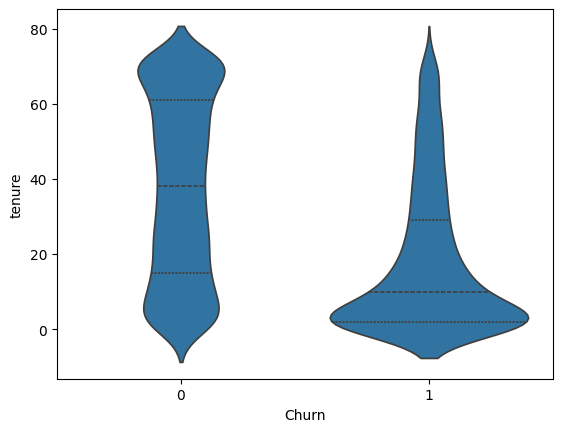

In [15]:
# Visualize Churn by tenure in a violin plot
sns.violinplot(data=telco_churn, x='Churn', y='tenure', inner='quartile')
plt.show();

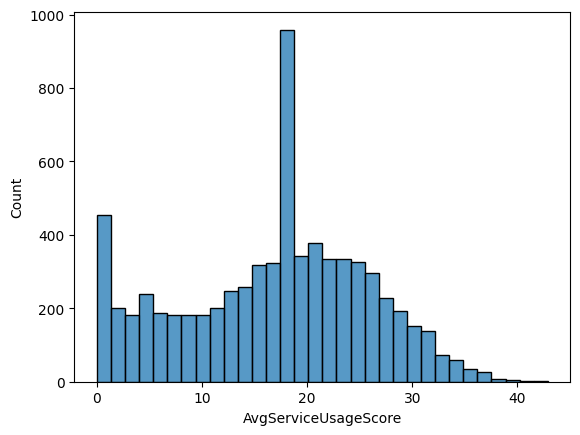

In [16]:
# Visualize the distribution of AvgServiceUsageScore
sns.histplot(data=telco_churn, x='AvgServiceUsageScore')
plt.show();

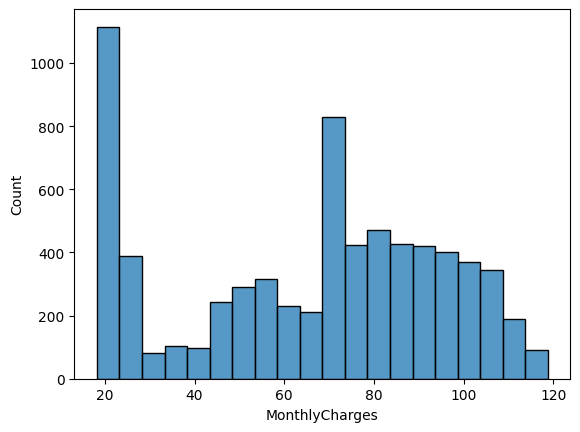

In [17]:
# Visualize the distribution of MonthlyCharges
sns.histplot(data=telco_churn, x="MonthlyCharges")
plt.show();

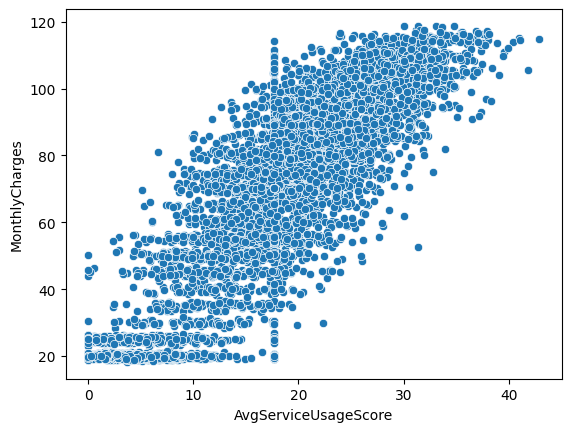

In [18]:
# Look at the relationship between AvgServiceUsageScore and MonthlyCharges
sns.scatterplot(data=telco_churn, x="AvgServiceUsageScore", y="MonthlyCharges")
plt.show();

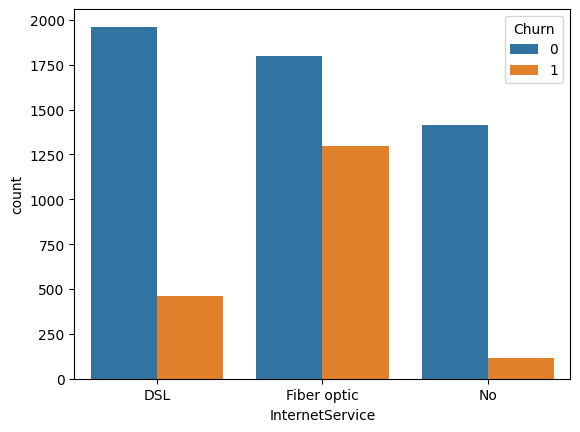

In [19]:
# Visualize the relationship between MonthlyCharges and Churn
sns.countplot(data=telco_churn, x='InternetService', hue='Churn')
plt.show();

---



## Exercise #2: Exploring and Preprocessing Data with Pandas & Seaborn

### Inspect a dataset using Pandas

In [ ]:
# Inspect data structure

In [ ]:
# Check for missing values

In [ ]:
# Check for duplicate rows

### Handle missing values and clean data

In [ ]:
# Create a clean working copy

In [ ]:
# Handle missing values of Income

In [ ]:
# Add new features for TotalChildren and 
# TotalSpent = sum of all spending (Mnt) categories

In [ ]:
# Convert Dt_Customer to datetime

In [ ]:
# Summarize structure

### Create visualizations to identify key business trends

In [ ]:
# Violin plot of Income by Campaign Response

In [ ]:
# Histogram of Total Spent

In [ ]:
# Relationship between Income and Total Spent colored by Campaign Response

In [ ]:
# Bar plot of Campaign Response by Education Level

---


# Module 2: Supervised Learning for Business Decisions

## Walkthrough #3: Build a Regression Model for Pricing Optimization

### Split the data into training and validation sets

In [20]:
# Choose AvgServiceUsageScore as the predictor and MonthlyCharges as the target
X = telco_churn[ ['AvgServiceUsageScore'] ]
y = telco_churn['MonthlyCharges']

In [21]:
# Scale the predictor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Make an 80/20 split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2025
)

### Train a linear regression model

In [23]:
# Instantiate and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
# Print the intercept and coefficient
print(f"Intercept: {lr.intercept_:.2f}")
print(f"Coefficient of usage rate scaled predicting price: {lr.coef_[0]:.2f}")

Intercept: 64.88
Coefficient of usage rate scaled predicting price: 25.85


### Evaluate model performance on the validation set

In [28]:
# Predict on the validation set
y_pred = lr.predict(X_val)

In [29]:
# Evaluate model performance with R^2 and MAE
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

In [30]:
# Print these evaluation metrics
r2
mae

0.8025282389048476

8.24736537196817

In [31]:
# Figure out mean and standard deviation of target value
mean_X = scaler.mean_[0]
std_X = scaler.scale_[0]

# Converting back to original scale
slope = lr.coef_[0]
intercept = lr.intercept_

new_slope = slope / std_X
new_intercept = intercept - slope * mean_X / std_X

new_slope
new_intercept

np.float64(2.8825089882493966)

np.float64(16.522451463962724)

For each one-unit increase in `AvgServiceUsageScore`, the `MonthlyCharges` increase by $2.88.

---

## Exercise #3: Build a Regression Model for Pricing Optimization

### Split the data into training and validation sets

In [ ]:
# Predictor (Income) and target (TotalSpent)

In [ ]:
# Standardize the predictor

In [ ]:
# Train-test split

### Train a linear regression model

In [ ]:
# Instantiate and fit the model

In [ ]:
# Print the intercept and coefficient

### Evaluate model performance on the validation set

In [ ]:
# Predict on the validation set

In [ ]:
# Get R^2 and MAE

In [ ]:
# Print these evaluation metrics


---

## Walkthrough #4: Implement a Classification Model for Customer Churn

### Split the data into training and validation sets

In [34]:
# Select relevant features and set Churn to target
features = ['tenure', 'SeniorCitizen', 'ServiceCount', 'InternetScore', 'AvgServiceUsageScore']
X = telco_churn[features]
y = telco_churn['Churn']

Scaling is not as important for tree-based models.

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

### Train a Random Forest classification model

In [36]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=2025)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=2025)

### Evaluate model performance on the validation set

In [38]:
# Predict on the validation set
y_pred = clf.predict(X_test)

In [39]:
# Print evaluation metrics (Accuracy, Precision, Recall)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)

0.7629524485450674

0.534375

0.4803370786516854

In [40]:
# Find confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[904, 149],
       [185, 171]])

In [41]:
# Set labels for confusion matrix and turn into DataFrame
labels = ['No Churn', 'Churn']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

In [42]:
# Print formatted confusion matrix
cm_df

,No Churn,Churn
No Churn,904,149
Churn,185,171


---

## Exercise #4: Implement a Classification Model for Customer Churn

### Split the data into training and validation sets

In [ ]:
# Select relevant features (Income, TotalSpent, TotalChildren) and 
# set Response to target

In [ ]:
# Split into training and validation sets

### Train a Random Forest classification model

In [ ]:
# Train Random Forest classifier

### Evaluate model performance on the validation set

In [ ]:
# Predict on the validation set

In [ ]:
# Get accuracy, precision, and recall

In [ ]:
# Set labels and turn confusion matrix into DataFrame

# Print formatted confusion matrix

---

# Module 3: Unsupervised Learning and Pattern Discovery in Business

## Walkthrough #5: Exploring K-Means Clustering for Customer Segmentation

### Apply K-Means clustering to segment customers

In [43]:
# Set ContractType as a numerical variable
telco_churn['ContractType'] = telco_churn['Contract'].map({
    'Month-to-month': 0, 'One year': 1, 'Two year': 2
})

# Select relevant features
features = ['tenure', 'ServiceCount', 'AvgServiceUsageScore', 'MonthlyCharges', 'InternetScore', 'ContractType']
X = telco_churn[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Determine the optimal number of clusters using the Elbow Method

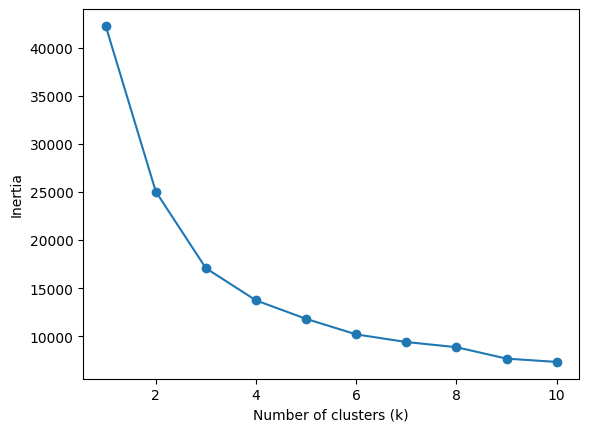

In [44]:
# Set inertia as an empty list
inertia = []
k_range = range(1, 11)

# Loop through k=1 to k=10
for k in k_range:
# Fit KMeans for each k and append inertia to the list    
    kmeans = KMeans(n_clusters=k, random_state=2025)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show();

### Verify using the silhouette score (optional but recommended)

In [45]:
# Evaluate silhouette scores for k=3 to k=6
silhouette_scores = {}

for k in range(3, 7):
    # Fit KMeans for each k and calculate silhouette score
        # Fit KMeans and get labels
    kmeans = KMeans(n_clusters=k, random_state=2025)
    labels = kmeans.fit_predict(X_scaled)
        # Calculate silhouette score
    score = silhouette_score(X_scaled, labels)
         # Store silhouette score
    silhouette_scores[k] = score

# Print silhouette scores
silhouette_scores

{3: np.float64(0.3593789986001599),
 4: np.float64(0.3426379222066999),
 5: np.float64(0.3356490479339938),
 6: np.float64(0.3289658614850517)}

### Fit K-means and assign cluster labels to each customer

In [46]:
# Let's assume the elbow suggested k=3
optimal_k = 3

# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=2025)

# Create a new column in the DataFrame for cluster labels
telco_churn['Cluster'] = kmeans.fit_predict(X_scaled)

### Visualize customer segments using a 2D plot

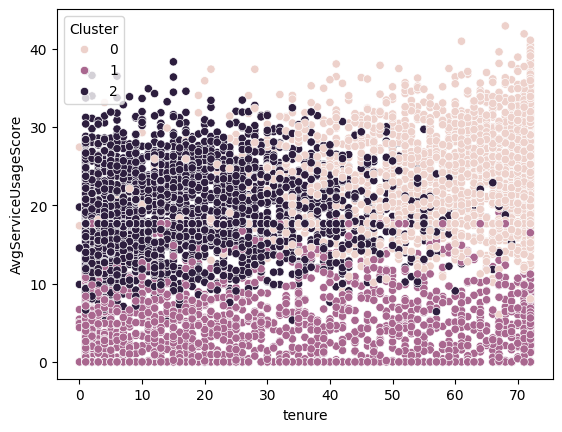

In [47]:
# Visualize clusters in 2D space (using tenure and AvgServiceUsageScore)
sns.scatterplot(data=telco_churn, x='tenure', y='AvgServiceUsageScore', hue='Cluster')
plt.show();

---

## Exercise #5: Exploring K-Means Clustering for Customer Segmentation

### Apply K-Means clustering to segment customers

In [ ]:
# Select relevant features (Income, TotalSpent, TotalChildren)


# Standardize features

### Determine the optimal number of clusters using the Elbow Method

In [ ]:
# Append inertia values for k=1 to k=10 after fitting KMeans

# Plot Elbow Method for Optimal K using inertia values

### Verify using the silhouette score (optional but recommended)

In [ ]:
# Calculate silhouette scores for k=3 to k=6

### Fit K-means and assign cluster labels to each customer

In [ ]:
# Determine optimal k from the elbow method + silhouette score

# Run KMeans with optimal k

# Create a new column in the DataFrame for cluster labels

### Visualize customer segments using a 2D plot

In [ ]:
# Look at clusters using TotalChildren and TotalSpent

# Uncomment to set x-axis to integer ticks only
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

---

## Walkthrough #6: Market Basket Analysis with Apriori Algorithm

### Prepare transactional data (services as items)

In [ ]:
# Select binary service columns to act like "products"


# Convert service columns to boolean (preference of apriori() function)

### Apply the Apriori algorithm to identify frequent itemsets

In [ ]:
# Use apriori to find frequent itemsets with min_support=0.2

### Generate association rules from frequent itemsets

In [ ]:
# Generate association rules with min_threshold=0.6 using confidence metric


# Return columns to extract insights

### Interpret insights

Key Metrics:



Interpretation of Key Rules:


Business insights:  


General pattern:


---

## Exercise #6: Market Basket Analysis with Apriori Algorithm

### Prepare transactional data (product categories as items)

In [ ]:
# Select binary columns representing product purchases

# Convert product columns to binary: 1 if any amount was spent, else 0

# Rename columns for cleaner output

# Set columns as booleans

### Apply the Apriori algorithm to identify frequent itemsets

In [ ]:
# Run apriori algorithm to find frequent itemsets with min_support=0.2


# Sort itemset values by support

### Generate association rules from frequent itemsets

In [ ]:
# Generate association rules with min_threshold=0.6 using confidence metric

# Sort rules by lift

### Interpret insights


---

# Module 4: Implementing and Evaluating ML Models

## Walkthrough #7: Exploring Cross-Validation for Model Evaluation

### Split data into training and validation sets

In [ ]:
# Features (AvgServiceUsageScore, tenure, MonthlyCharges) and target (Churn)


# Scale the features since logistic regression is a linear model


# Split into train and test sets (80% train, 20% test)

### Train a classification model using logistic regression

In [ ]:
# Initialize logistic regression model

### Apply k-fold cross-validation to evaluate model performance

In [ ]:
# 5-fold cross-validate with multiple metrics (accuracy, precision, recall, f1)

### Compare metrics across folds

In [ ]:
# Average performance across folds

---

## Exercise #7: Exploring Cross-Validation for Model Evaluation

### Split data into training and validation sets

In [ ]:
# Features (Income, TotalSpent, TotalChildren) and target Response


# Scale features


# Train-test split

### Train a classification model using logistic regression

In [ ]:
# Initialize logistic regression model

### Apply k-fold cross-validation to evaluate model performance

In [ ]:
# 5-fold cross-validation with multiple metrics

### Compare metrics across folds

In [ ]:
# Average performance across folds

---

## Walkthrough #8: Hyperparameter Tuning with Grid Search

### Train a Random Forest classifier

In [ ]:
# Features (AvgServiceUsageScore, tenure, MonthlyCharges) and target Churn


# Initialize Random Forest

### Apply grid search to find optimal hyperparameters

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV setup


# Run grid search

### Evaluate model improvement using accuracy and recall

In [ ]:
# Predict using the best model

# Show accuracy and recall for best model

### Interpret the best hyperparameter combination

In [ ]:
# Print the best hyperparameters found

---

## Exercise #8: Hyperparameter Tuning with Grid Search

### Train a Random Forest classifier

In [ ]:
# Features (Income, TotalSpent, TotalChildren) and target Response


# Initialize Random Forest

### Apply grid search to find optimal hyperparameters

In [ ]:
# Define the hyperparameter grid
param_grid_m = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV setup with 5-fold cross-validation


# Run grid search

### Evaluate model improvement using accuracy and recall

In [ ]:
# Predict using the best model


# Show accuracy and recall for best model

### Interpret the best hyperparameter combination

In [ ]:
# Print the best hyperparameters found